### Linear Regression Prediction

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [27]:
data = pd.read_excel('data/Data SW 3 Tahun.xlsx')
bulan = ['Januari','Februari','Maret','April',
         'Mei','Juni','Juli','Agustus',
         'September','Oktober','November','Desember'
        ]

In [31]:
data['HARI'] = '01'
data['date'] = data.apply(lambda row :
                          str(row['TAHUN'])+'-'+str(bulan.index(row['BULAN'])+1)+'-'+row['HARI'],axis=1)
data

,TAHUN,BULAN,KD,SW,DD,HARI,date
0,2017,Januari,575328000,9979027900,2209917000,01,2017-1-01
1,2017,Februari,569076000,9759141700,2209618000,01,2017-2-01
2,2017,Maret,580662000,10058572400,2142945000,01,2017-3-01
3,2017,April,501777000,8701330800,1919522000,01,2017-4-01
4,2017,Mei,639033000,10902165800,2585780000,01,2017-5-01
5,2017,Juni,639033000,10902165800,2585780000,01,2017-6-01
6,2017,Juli,708198000,11733674500,1659011750,01,2017-7-01
7,2017,Agustus,705111000,11807659700,1683043250,01,2017-8-01
8,2017,September,648702000,10992065600,1592544000,01,2017-9-01
9,2017,Oktober,722199000,12136387600,1152304500,01,2017-10-01


In [86]:
data['date'] = pd.to_datetime(data['date'])
new_data = pd.concat([data['date'],data['KD'],data['SW'],data['DD']],axis=1)
new_data.to_csv('data.csv',index=False,header=True)

In [2]:
df = pd.read_csv('data/data.csv')

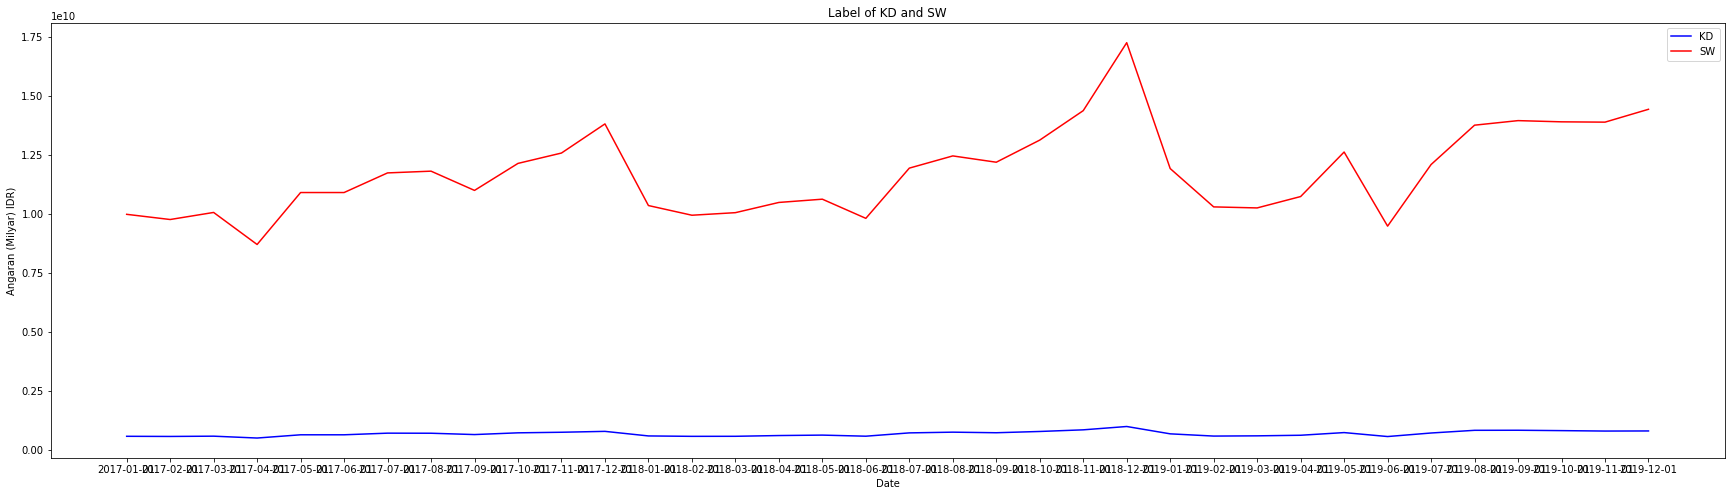

In [3]:
plt.figure(figsize=(30, 8))
plt.plot(df['date'], df['KD'], 'b-', label = 'KD')
plt.plot(df['date'], df['SW'], 'r-', label = 'SW')
plt.xlabel('Date'); plt.ylabel('Angaran (Milyar) IDR)'); plt.title('Label of KD and SW')
plt.legend();

In [4]:
df['date'] = pd.to_datetime(df['date'],errors="coerce")

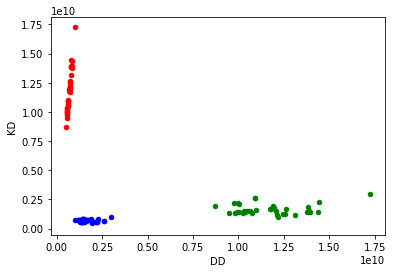

In [5]:
ax1 = df.plot(kind='scatter', x='KD', y='SW', color='r')    
ax2 = df.plot(kind='scatter', x='SW', y='DD', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='DD', y='KD', color='b', ax=ax1)
plt.show()

In [221]:
X = df.iloc[:,0].values.reshape(-1,1)  # date column
y = df.iloc[:,1].values  # KD column
# y = y.reshape(-1,1)

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=20)  

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [318]:
y_pred,y_test

(array([6.18133653e+08, 9.78282469e+08, 5.88106409e+08, 5.59769170e+08,
        7.44111174e+08, 6.11399652e+08, 7.78010771e+08, 6.34619951e+08]),
 date
 2017-05-01    639033000
 2018-12-01    990498000
 2018-02-01    573558000
 2017-02-01    569076000
 2017-11-01    746553000
 2018-01-01    590601000
 2018-10-01    779754000
 2019-04-01    619608000
 Name: KD, dtype: int64)

In [319]:

import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib.inline


UsageError: Line magic function `%matplotlib.inline` not found.


In [320]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):
    """For visualizing and comparing results, undoes the scaling effect on
    predictions.
    Keyword arguments:
    -- y_pred: model predictions
    -- x_test: features from the test set used for predictions
    -- scaler_obj: the scaler objects used for min-max scaling
    -- lstm: indicate if the model run is the lstm. If True, additional
             transformation occurs
    """

    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)

    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0, len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index], x_test[index]],
                                            axis=1))

    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0],
                                          pred_test_set.shape[2])

    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)

    return pred_test_set_inverted


In [321]:
def load_data(file_name):
    """Returns a pandas dataframe from a csv file."""
    return pd.read_csv(file_name)

In [322]:
def predict_df(unscaled_predictions, original_df):
    """Generates a dataframe that shows the predicted KD for each month
    for plotting results.
    Keyword arguments:
    -- unscaled_predictions: the model predictions that do not have min-max or
                             other scaling applied
    -- original_df: the original monthly KD dataframe
    """
    #create dataframe that shows the predicted KD
    result_list = []
    kd_dates = list(original_df[-13:].date)
    act_kd = list(original_df[-13:].KD)

    for index in range(0, len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] +
                                        act_kd[index])
        result_dict['date'] = kd_dates[index+1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result


In [323]:
def get_scores(unscaled_df, original_df, model_name):
    """Prints the root mean squared error, mean absolute error, and r2 scores
    for each model. Saves all results in a model_scores dictionary for
    comparison.
    Keyword arguments:
    -- unscaled_predictions: the model predictions that do not have min-max or
                             other scaling applied
    -- original_df: the original monthly KD dataframe
    -- model_name: the name that will be used to store model scores
    """
    rmse = np.sqrt(mean_squared_error(original_df.KD[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.KD[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.KD[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

In [324]:
def plot_results(results, original_df, model_name):
    """Plots predictions over original data to visualize results. Saves each
    plot as a png.
    Keyword arguments:
    -- results: a dataframe with unscaled predictions
    -- original_df: the original monthly KD dataframe
    -- model_name: the name that will be used in the plot title
    """
    fig, ax = plt.subplots(figsize=(35, 5))
    sns.lineplot(original_df.date, original_df.KD, data=original_df, ax=ax,
                 label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax,
                 label='Predicted', color='red')
    ax.set(xlabel="Date",
           ylabel="KD",
           title=f"{model_name} KD Forecasting Prediction")
    ax.legend()
    sns.despine()
    
    plt.savefig('data/model_output/'+model_name+'_forecast.jpg')
    plt.show()

In [325]:
def scale_data(train_set, test_set):
    """Scales data using MinMaxScaler and separates data into X_train, y_train,
    X_test, and y_test.
    Keyword Arguments:
    -- train_set: dataset used to train the model
    -- test_set: dataset used to test the model
    """

    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)

    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)

    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)

    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()

    return X_train, y_train, X_test, y_test, scaler


In [326]:
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col = 'lag_' + str(i)
        supervised_df[col] = df['KD'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    supervised_df.to_csv('data/model_df.csv', index=False)
    
    return supervised_df
model_df = generate_supervised(df[['date','KD']])
model_df

,date,KD,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2018-01-01,590601000,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0,708198000.0,639033000.0,639033000.0,501777000.0,580662000.0,569076000.0,575328000.0
1,2018-02-01,573558000,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0,708198000.0,639033000.0,639033000.0,501777000.0,580662000.0,569076000.0
2,2018-03-01,575424000,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0,708198000.0,639033000.0,639033000.0,501777000.0,580662000.0
3,2018-04-01,607317000,575424000.0,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0,708198000.0,639033000.0,639033000.0,501777000.0
4,2018-05-01,625842000,607317000.0,575424000.0,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0,708198000.0,639033000.0,639033000.0
5,2018-06-01,579528000,625842000.0,607317000.0,575424000.0,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0,708198000.0,639033000.0
6,2018-07-01,719814000,579528000.0,625842000.0,607317000.0,575424000.0,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0,708198000.0
7,2018-08-01,750468000,719814000.0,579528000.0,625842000.0,607317000.0,575424000.0,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0,705111000.0
8,2018-09-01,726006000,750468000.0,719814000.0,579528000.0,625842000.0,607317000.0,575424000.0,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0,648702000.0
9,2018-10-01,779754000,726006000.0,750468000.0,719814000.0,579528000.0,625842000.0,607317000.0,575424000.0,573558000.0,590601000.0,784317000.0,746553000.0,722199000.0


In [327]:
def regressive_model(train_data, test_data, model, model_name):
    """Runs regressive models in SKlearn framework. First calls scale_data
    to split into X and y and scale the data. Then fits and predicts. Finally,
    predictions are unscaled, scores are printed, and results are plotted and
    saved.
    Keyword arguments:
    -- train_set: dataset used to train the model
    -- test_set: dataset used to test the model
    -- model: the sklearn model and model arguments in the form of
              model(kwarga)
    -- model_name: the name that will be used to store model scores and plotting
    """

    # Split into X & y and scale data
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data,
                                                                 test_data)
    # Run sklearn models
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)

    # Undo scaling to compare predictions against original data
    original_df = load_data('data/data.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
    print(unscaled_df,original_df)
    # print scores and plot results
    get_scores(unscaled_df, original_df, model_name)
    plot_results(unscaled_df, original_df, model_name)

In [328]:
def tts(data):
    """Splits the data into train and test. Test set consists of the last 12
    months of data.
    """
    data = data.drop(['KD', 'date'], axis=1)
    train, test = data[0:-12].values, data[-12:].values

    return train, test

    pred_value        date
0   1533400401  2019-01-01
1    929812442  2019-02-01
2    607600410  2019-03-01
3    868920736  2019-04-01
4    808644285  2019-05-01
5    842406481  2019-06-01
6    547636864  2019-07-01
7    722852464  2019-08-01
8   1161773772  2019-09-01
9   1087429113  2019-10-01
10  1108642372  2019-11-01
11  1351083770  2019-12-01           date         KD           SW          DD
0   2017-01-01  575328000   9979027900  2209917000
1   2017-02-01  569076000   9759141700  2209618000
2   2017-03-01  580662000  10058572400  2142945000
3   2017-04-01  501777000   8701330800  1919522000
4   2017-05-01  639033000  10902165800  2585780000
5   2017-06-01  639033000  10902165800  2585780000
6   2017-07-01  708198000  11733674500  1659011750
7   2017-08-01  705111000  11807659700  1683043250
8   2017-09-01  648702000  10992065600  1592544000
9   2017-10-01  722199000  12136387600  1152304500
10  2017-11-01  746553000  12575369700  1256076000
11  2017-12-01  784317000  1380958610

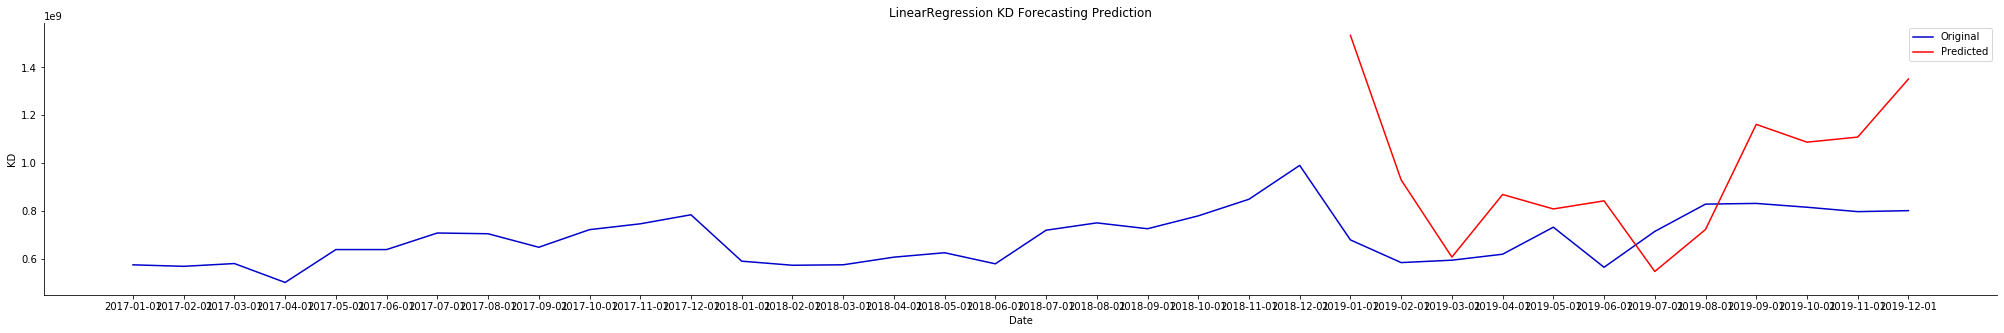

In [329]:
train, test = tts(model_df)
model_scores = {}
# Call model frame work for linear regression
regressive_model(train, test, LinearRegression(),'LinearRegression')

In [330]:
multi_df = load_data('data/data.csv')
multi_df = multi_df.set_index('date')
X = pd.DataFrame(np.c_[multi_df['SW'], multi_df['DD']], columns=['SW','DD'])
y = multi_df['KD']

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [332]:
lin_reg_mod = LinearRegression()

In [333]:
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [334]:
pred = lin_reg_mod.predict(X_test)

In [335]:
pred

array([8.38310420e+08, 5.85734339e+08, 6.04449953e+08, 7.10013049e+08,
       6.24177668e+08, 8.08707626e+08, 7.74943632e+08, 6.09472687e+08])

In [336]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

In [337]:
print(test_set_rmse)
print(test_set_r2)

17334157.340388868
0.9687836619344821


In [338]:
multi_df['Forecast'] = np.nan

result = multi_df
last_date = result.reset_index().iloc[-1].date
last_year = last_date.split('-')[0]
last_month = last_date.split('-')[1]

for i in pred:
    last_month=int(last_month)+1
    next_month = last_month-11 if int(last_month-1)+1 > 11 else last_month-1
    year = str(int(last_year)+1) if int(last_month-1)+1 > 11 else last_year
    next_date = str(year)+'-'+str('0'+str(next_month+1) if next_month+1 < 10 else next_month+1)+'-01'
    print(next_date)
    multi_df.loc[next_date] = [np.nan for _ in range(len(multi_df.columns)-1)]+[i]

result
# multi_df['KD'].plot()
# multi_df['Forecast'].plot()
# plt.figsize=(35, 5)
# plt.legend(loc=4)
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

2020-03-01
2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01


,KD,SW,DD,Forecast
date,,,,
2017-01-01,575328000.0,9.979028e+09,2.209917e+09,NaN
2017-02-01,569076000.0,9.759142e+09,2.209618e+09,NaN
2017-03-01,580662000.0,1.005857e+10,2.142945e+09,NaN
2017-04-01,501777000.0,8.701331e+09,1.919522e+09,NaN
2017-05-01,639033000.0,1.090217e+10,2.585780e+09,NaN
2017-06-01,639033000.0,1.090217e+10,2.585780e+09,NaN
2017-07-01,708198000.0,1.173367e+10,1.659012e+09,NaN
2017-08-01,705111000.0,1.180766e+10,1.683043e+09,NaN
2017-09-01,648702000.0,1.099207e+10,1.592544e+09,NaN
